In [2]:
pip install imbalanced_learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, precision_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [4]:
df = pd.read_csv('credit_risk_dataset.csv')

In [5]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Data Preprocessing

In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [15]:
df['loan_grade'].value_counts()

loan_grade
A    9402
B    9151
C    5699
D    3248
E     870
F     209
G      59
Name: count, dtype: int64

Exploratory Data Analysis 

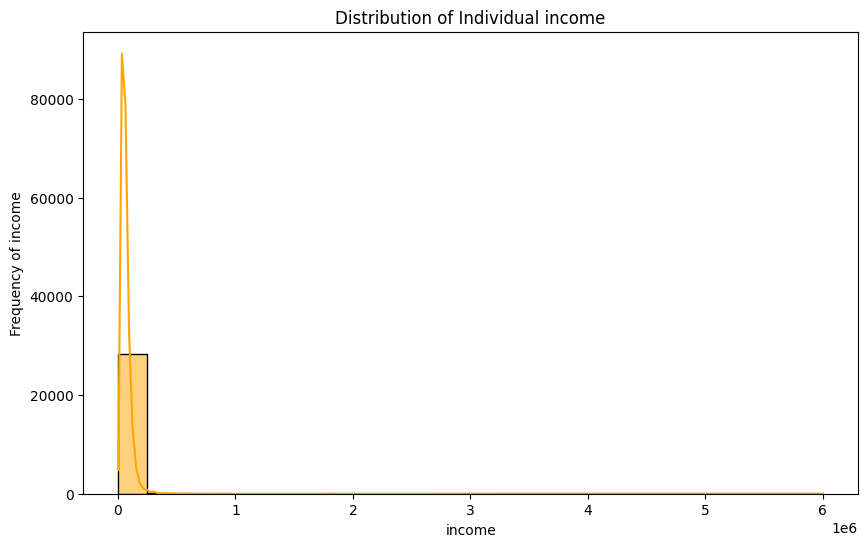

In [11]:
#Distribution of People's income
plt.figure(figsize=(10, 6))
sns.histplot(df['person_income'], kde=True, bins=25, color='orange')
plt.title('Distribution of Individual income')
plt.xlabel('income')
plt.ylabel('Frequency of income')
plt.show()

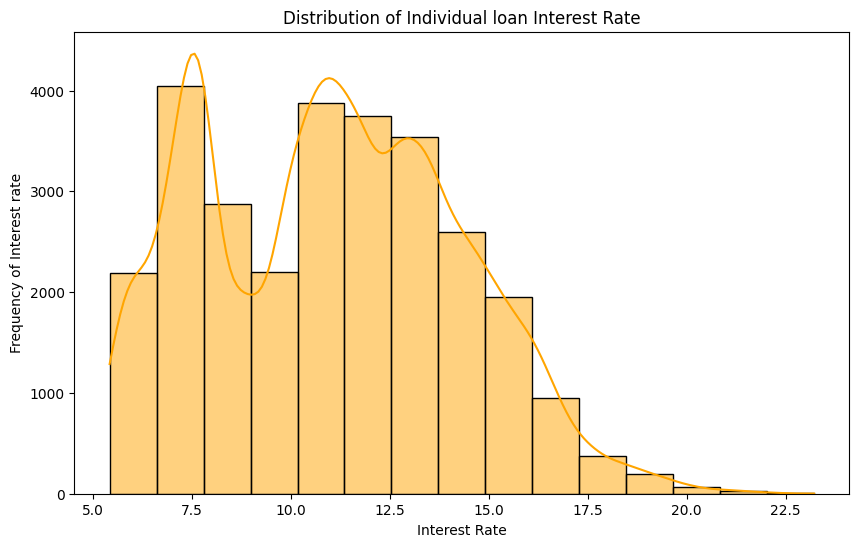

In [12]:
#Distribution of People's income
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_int_rate'], kde=True, bins=15, color='orange')
plt.title('Distribution of Individual loan Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency of Interest rate')
plt.show()

C:\Users\t\AppData\Local\Temp\ipykernel_42840\4044040230.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='person_home_ownership', data=df, palette='pastel')


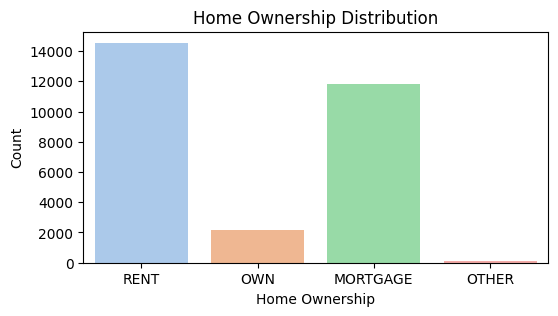

C:\Users\t\AppData\Local\Temp\ipykernel_42840\4044040230.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_intent', data=df, palette='pastel')


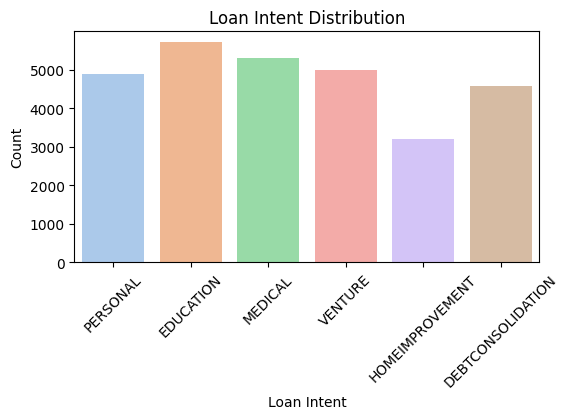

In [13]:
# 4. Distribution of Categorical Features
plt.figure(figsize=(6, 3))
sns.countplot(x='person_home_ownership', data=df, palette='pastel')
plt.title("Home Ownership Distribution")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6, 3))
sns.countplot(x='loan_intent', data=df, palette='pastel')
plt.title("Loan Intent Distribution")
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [14]:
# 5. Loan Status Analysis
plt.figure(figsize=(6, 4))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='viridis')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (1=Default, 0=Not Default)")
plt.ylabel("Proportion")
plt.show()

NameError: name 'loan_status_counts' is not defined

<Figure size 600x400 with 0 Axes>

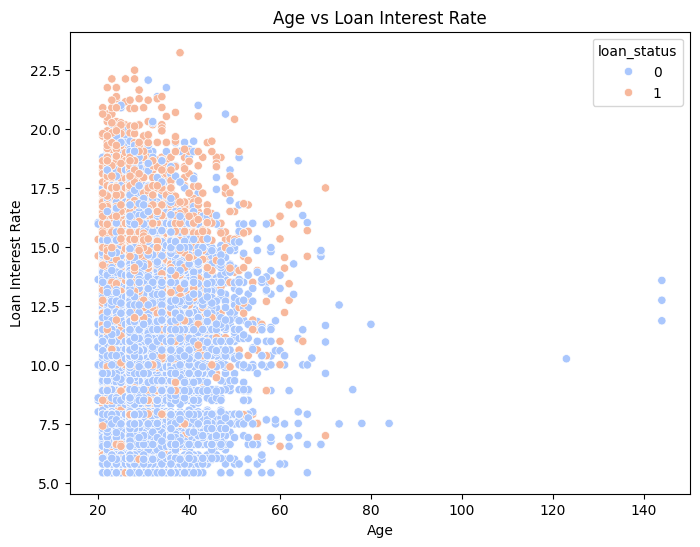

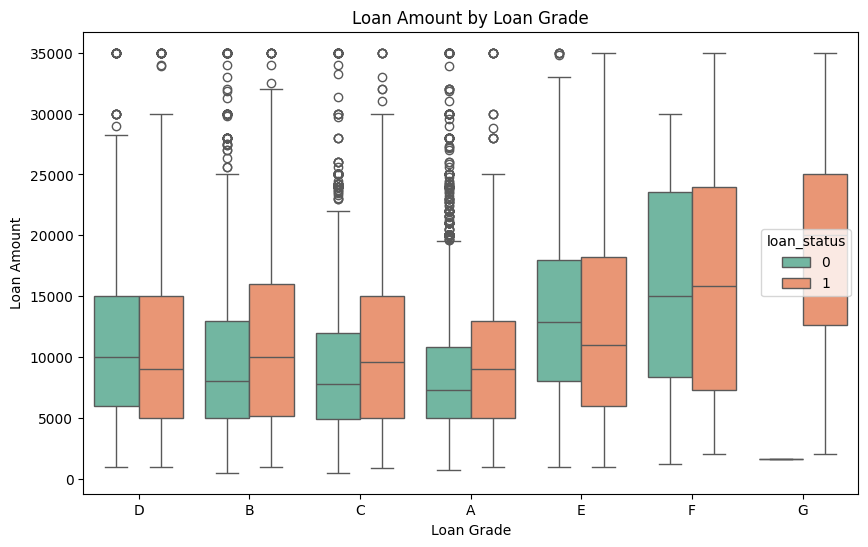

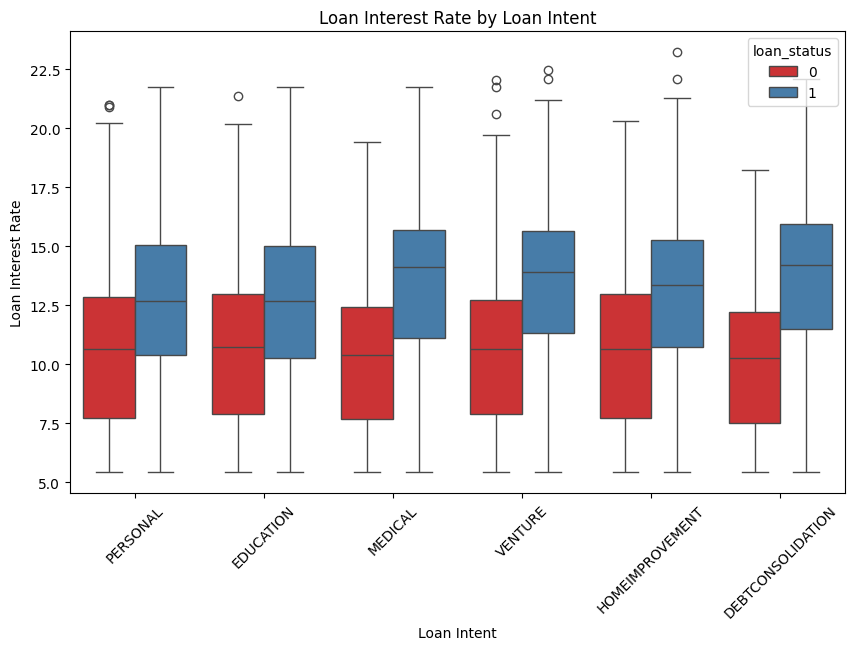

In [ ]:

# 7. Relationship Between Features
# Age vs. Loan Interest Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='person_age', y='loan_int_rate', hue='loan_status', palette='coolwarm')
plt.title("Age vs Loan Interest Rate")
plt.xlabel("Age")
plt.ylabel("Loan Interest Rate")
plt.show()

# Loan Amount vs Loan Grade
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_grade', y='loan_amnt', hue='loan_status', palette='Set2')
plt.title("Loan Amount by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Loan Amount")
plt.show()

# 8. Loan Intent vs Interest Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='loan_intent', y='loan_int_rate', hue='loan_status', palette='Set1')
plt.title("Loan Interest Rate by Loan Intent")
plt.xlabel("Loan Intent")
plt.ylabel("Loan Interest Rate")
plt.xticks(rotation=45)
plt.show()

Feature Engineering

In [ ]:
df.shape

(28638, 12)

In [ ]:
# Encode categorical features
encoder = LabelEncoder()
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head(7)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2
6,26,77100,3,8.0,1,1,35000,12.42,1,0.45,0,3


Correlation of Features with Loan Status:
loan_status                   1.000000
loan_percent_income           0.379689
loan_grade                    0.379683
loan_int_rate                 0.339350
person_home_ownership         0.208532
cb_person_default_on_file     0.182019
loan_amnt                     0.113550
cb_person_cred_hist_length   -0.015649
person_age                   -0.023333
loan_intent                  -0.064628
person_emp_length            -0.082638
person_income                -0.139938
Name: loan_status, dtype: float64


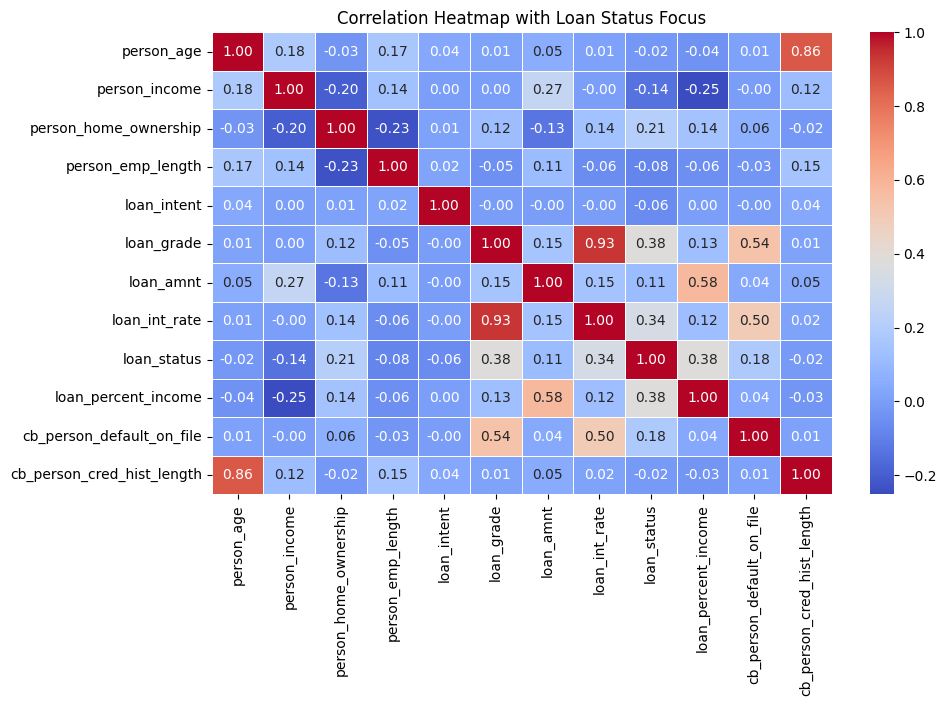

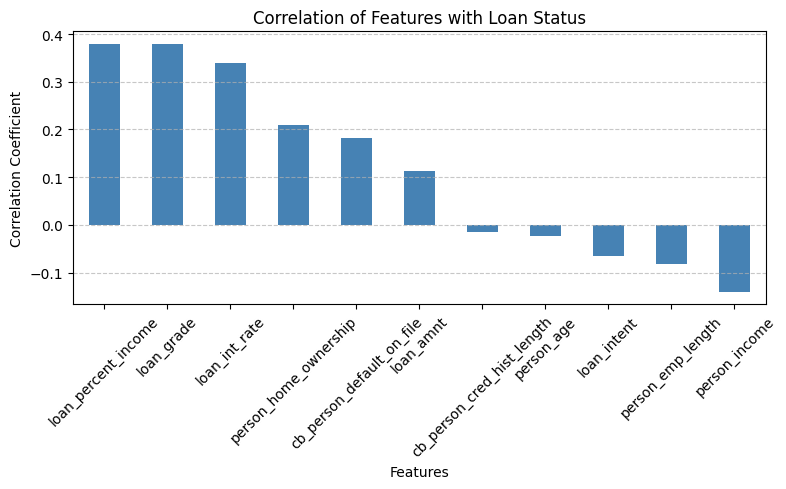

In [ ]:
# Correlation Analysis with Focus on `loan_status`
plt.figure(figsize=(10, 6))

# Compute correlations
correlation_matrix = df.corr()

# Extract correlations with loan_status
loan_status_corr = correlation_matrix['loan_status'].sort_values(ascending=False)

print("Correlation of Features with Loan Status:")
print(loan_status_corr)

# Visualize Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap with Loan Status Focus")
plt.show()

# Focus on Top Correlated Features
plt.figure(figsize=(8, 5))
loan_status_corr.drop('loan_status').plot(kind='bar', color='steelblue')
plt.title("Correlation of Features with Loan Status")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Feature selection

The combination of these three variables captures different dimensions of the borrower's financial profile:
loan_grade represents qualitative creditworthiness.
loan_int_rate reflects quantitative risk pricing.
person_income provides insight into the borrower's capacity to repay.
Correlation Strength: The selected features include the strongest correlates (loan_grade and loan_int_rate) and a feature with weaker but critical socio-economic implications (person_income).

In [ ]:
 #based on their correlation values and their contextual relevance to the loan default prediction problem.
 
#scaler = StandardScaler()
#there was higher accuracy scoore when no scaling was applied
X = df[['loan_grade', 'loan_int_rate', 'person_income']] #check for and remove outliers
#X_scaled = scaler.fit_transform(X)
y = df['loan_status']
 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# Train Logistic Regression Model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_resampled, y_train_resampled)

# Train Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train_resampled, y_train_resampled)




DecisionTreeClassifier(random_state=42)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28638 entries, 0 to 32580
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loan_grade     28638 non-null  int64  
 1   loan_int_rate  28638 non-null  float64
 2   person_income  28638 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 894.9 KB


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      4443
           1       0.40      0.71      0.51      1285

    accuracy                           0.70      5728
   macro avg       0.65      0.70      0.65      5728
weighted avg       0.78      0.70      0.72      5728

Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4443
           1       0.56      0.54      0.55      1285

    accuracy                           0.80      5728
   macro avg       0.71      0.71      0.71      5728
weighted avg       0.80      0.80      0.80      5728

Logistic Regression - Confusion Matrix:


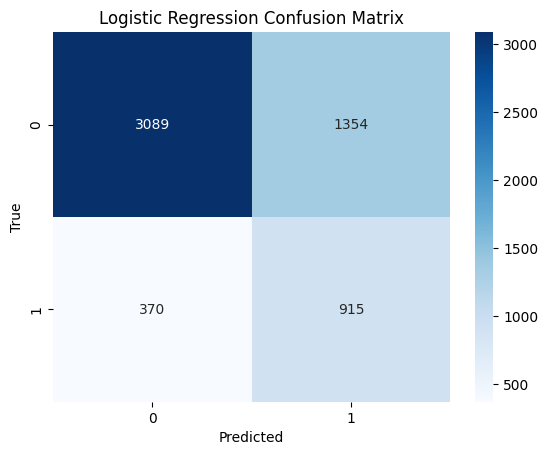

Decision Tree - Confusion Matrix:


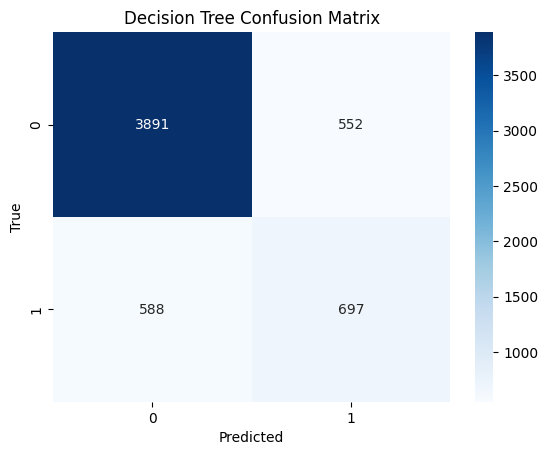

In [ ]:
# Make Predictions
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate Performance for Logistic Regression
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Evaluate Performance for Decision Tree
print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))

# Confusion Matrix for Logistic Regression
print("Logistic Regression - Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Decision Tree
print("Decision Tree - Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_decision_tree), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Logistic Regression Accuracy: 0.6990
Decision Tree Accuracy: 0.8010


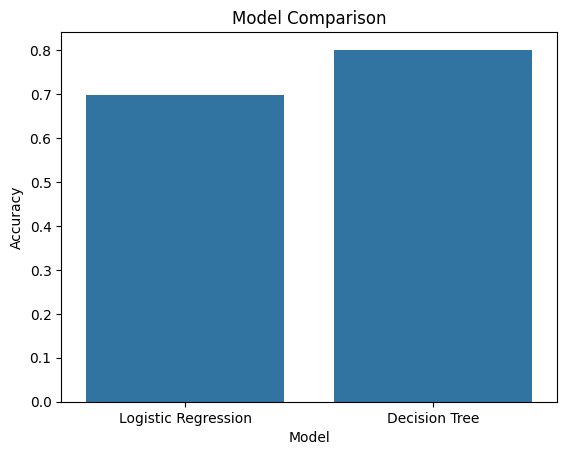

In [ ]:

# Comparing the Models: Check which model gives better performance
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)


print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print(f"Decision Tree Accuracy: {decision_tree_accuracy:.4f}")

# Optionally, plot comparison (if you want to visualize the comparison)
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [log_reg_accuracy, decision_tree_accuracy]
})

sns.barplot(x='Model', y='Accuracy', data=model_comparison)
plt.title('Model Comparison')
plt.show()

In [ ]:
import joblib

# Save the Decision Tree model
joblib.dump(decision_tree_model, 'decision_tree_model.joblib')
#joblib.dump(scaler, 'scaler.joblib')

print("Model saved as 'decision_tree_model.joblib'")

Model saved as 'decision_tree_model.joblib'
